<a href="https://colab.research.google.com/github/IonatanPerezColab/CursoML/blob/main/Semana2/Notas_y_ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 - Regresiones lineales

## Convenciones y definiciones
- Si hay mas de una caracterisitca de cada dato se usa la notacion $x_j^i$ donde j hace referencia al tipo de caracteristica del elemento del dataset e i hace referencia al numero de elemento del dataset (vector de datos que corresponden a una misma muestra que pertenece a $\mathbb{R}^n$).
- Se suele llamar "n" a la dimencionalidad de las caracteriticas que tiene cada entrada o dato del dataset. Recordar que para el numero de datos usabamos la letra "m".
- mean normalization: Correr el valor promedio para que sea cero y normlizar (son criterios para acelerar convergencia no tienen consecuencias exactas por eso la eleccion es flexible) $$ x_i = \frac{(x_i-\mu)}{(x_{max}-x_{min})/\sigma}$$

- Ecuación normal, solucion analitica a la minimazacion de $J(\theta)$. Ecuación de derivadas parciales.  Haciendo magia que me gustaria entender (hable con fran y sale de definir la norma de $|\hat y - y_i|$ pero no se si puedo reconstruirlo), se llega derivando respecto $\theta$ a que $\theta = (X^T X)^{-1} X^T y$. Me gustaria rastrear porque pasa esto! Segun fran si no hay caracteristicas que en el dataset sean LD eso asegura que la matriz $X^TX$ es definida positiva y entonces tiene inversa. Pero si hay elementos LD eso puede ser un problema porque se podria eliminar los elementos LD pero hay ahi una arbitrariedad que es importante interpretar. 

- Al tratar de invertir $X^TX$ puede no ser inversible porque hay elementos LD o porque hay mas caracteristicas que muestras.

## Ideas

- Si un modelo depende de mas de una caracteritica, el modelo va a tener una variable vectorial
- En un modelo multivariado que depende de n caracteristicas se puede escribir la hipotesis como $h(x) = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + ... + \theta_n \cdot x_n$ lo cual se puede escribir como $h(X) = \Theta^T \cdot X$ con $x_0 = 1$ donde $X,\Theta \in \mathbb{R}^{n+1}$ 
- El gradiente para hacer un algoritmo de descenso como en el caso de una variable queda igual (hay que agregar un subindice por formalidad) porque las derivadas de $\theta_i$ respecto a $x_j$ da cero salvo que $i=j$. 

- Queda que 
$$ \theta_j(t+1) = \theta_j(t) - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta(t)}(x^i) - y^i) \cdot x_j^i$$
con j en $[0;n]$

- Para testear algoritmos de convergencia es util ver como evoluciona $J(\theta_i)$ vs $i$ donde $\theta_i$ es el resultado de modificar $\theta$ luego de la iteración i. La idea es que la función deberia ser decreciente con mucha pendiente al principio y aplanarse despues. 

- Una manera de evaluar si el algoritmo de convergencia convergio es evaluar $J(\theta_{i-1}) - J(\theta_i)$ y ver si es menor que un $\epsilon$. Pero no es facil elegir el $\epsilon$, a veces es mas facil ver la forma del grafico.

- Otro metaparametro (parametro del algoritmo y no del ajuste de los datos \theta) a ajustar es el $\alpha$. En general si hay funciones que son muy concavas y el $\alpha$ es grande puede "oscilar" o ser una función creciente. En cambio si $\alpha$ es muy chico respecto a la concavidad puede converger muy lento. 

- Se puede armar polinomios u otra funcion en una variable y es equivalente a un tratamiento multivariado. Es importante normalizar cuando se empiezan a hacer cuentas porque los rango de valores se pueden ir al diablo sino. 

- Comparación gradiente descendiente vs ecuación normal. Ecuación normal es mucho mas robusto excepto que escala como $n^3$ cuando hay que calcular la inversa de $X^TX$, ahi se vuelve un problema y conviene usar gradiente descendiente. Otro lugar donde no funciona ecuación normal es si los algortimos o modelos no son lineales. 

## Buenas prácticas

- En un espacio multivariado (dataset con muchas caracteristicas-features) conviene normalizar las variables, para que los algoritmos de convergencia sean mas más rápidos. 
- Hacer mean normzalization: desplazar la variable para que el valor medio este en cero ademas de normalizar. 

In [ ]:
# Cuentas ejercicio 

import numpy as np

datos_x2 = [7921,5184,8836,4761]
avg = np.mean(datos_x2)
print (avg)
rango = max(datos_x2)-min(datos_x2)
print (rango)
print ((4761-avg)/rango)

6675.5
4075
-0.4698159509202454


# Ejercitación final semana 2

# Ejercicio 1



    Poblacion  Ganancia
0      6.1101  17.59200
1      5.5277   9.13020
2      8.5186  13.66200
3      7.0032  11.85400
4      5.8598   6.82330
..        ...       ...
92     5.8707   7.20290
93     5.3054   1.98690
94     8.2934   0.14454
95    13.3940   9.05510
96     5.4369   0.61705

[97 rows x 2 columns]


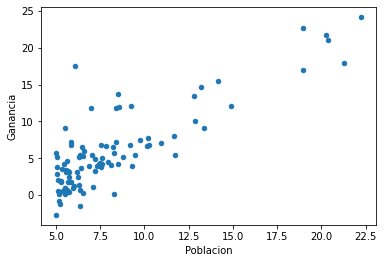

In [34]:
# Armamos una matriz identidad de 5x5

import numpy as np
import pandas as pd

np.eye(5)

# Importamos los datos del archivo ex1data1.txt a un array

df = pd.read_csv("https://raw.githubusercontent.com/IonatanPerezColab/CursoML/main/Semana2/machine-learning-ex1/ex1/ex1data1.txt", delimiter=',', header=None, names=['Poblacion', 'Ganancia'])
print (df)
# Los graficamos
df.plot.scatter(x="Poblacion", y="Ganancia")

Vamos a usar el gradiente descendiente para ajustar un modelo de la forma $h(x) = \theta_0 + \theta_1 \cdot x$ que se puede escribir en forma vectorial como $Y = \Theta^T X$

La función costo la definimos como $J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_{\theta}(x^i)-y^i)^2$

Vamos a hacer el metodo "manual" que sugiere el curso pero despues vamos a tratar de implementar lo mismo con scikitlearn. 

hay que hacer $\theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^i)-y^i)x_j^i$ actualizando simultaneamente en todos los j. 

In [35]:
x = df[["Poblacion"]]
x["x_0"] = 1
# Ordenamos las columnas
x = x[['x_0', 'Poblacion']]
parametros = [2,1]

    x_0  Poblacion
0     1     6.1101
1     1     5.5277
2     1     8.5186
3     1     7.0032
4     1     5.8598
..  ...        ...
92    1     5.8707
93    1     5.3054
94    1     8.2934
95    1    13.3940
96    1     5.4369

[97 rows x 2 columns]
